In [112]:
import pandas as pd
Iris = pd.read_csv("Iris.csv")
Iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [113]:
Iris["variety"].value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: variety, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


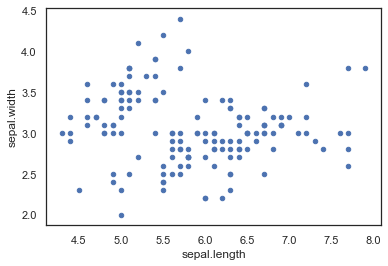

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", color_codes=True)
Iris.plot(kind="scatter", x="sepal.length", y="sepal.width")

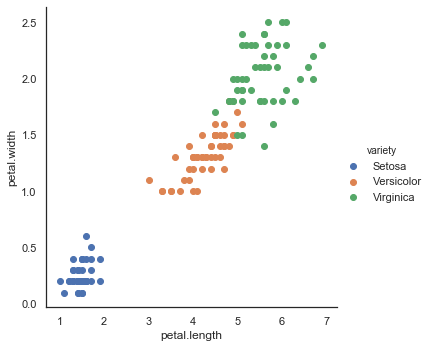

In [117]:
sns.FacetGrid(Iris, hue="variety", size=5) \
   .map(plt.scatter, "petal.length","petal.width") \
   .add_legend()

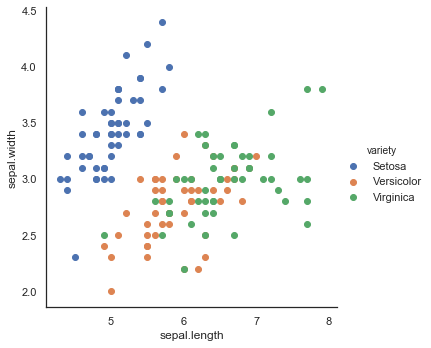

In [56]:
sns.FacetGrid(Iris, hue="variety", size=5) \
   .map(plt.scatter, "sepal.length","sepal.width") \
   .add_legend()

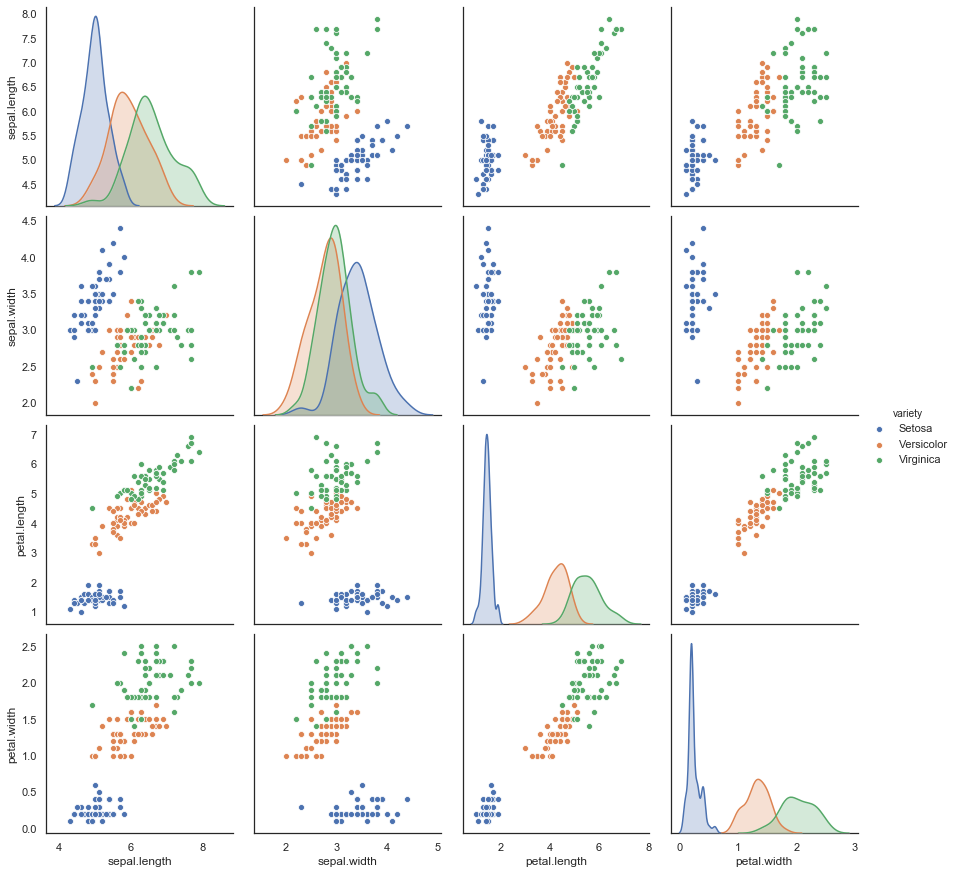

In [124]:
sns.pairplot(Iris, hue="variety",size=3)

In [125]:
Iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
X = Iris[["sepal.length","sepal.width","petal.length","petal.width"]]
y = Iris.variety

In [70]:
# Step 1 : Standardization
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


In [71]:
# Step 2 : Eigendecomposition - Computing Eigenvectors and Eigenvalues
# Covariance Matrix

import numpy as np

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [72]:
# Eigenvectors and Eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [73]:
# Singular Value Decomposition SVD 
u,s,v = np.linalg.svd(X.T)
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [134]:
# Step 3 : Selecting Principal Components 
# Sorting Eigenpairs
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.938085050199993
0.9201649041624873
0.1477418210449481
0.020853862176462803


In [135]:
# explained Variance 
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp = eig_vals/tot
var_exp
cum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [126]:
# Projection Matrix 
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix P:\n', matrix_w)


Matrix P:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [80]:
# Step 4 : projection onto the new feature space
Y = X.dot(matrix_w)


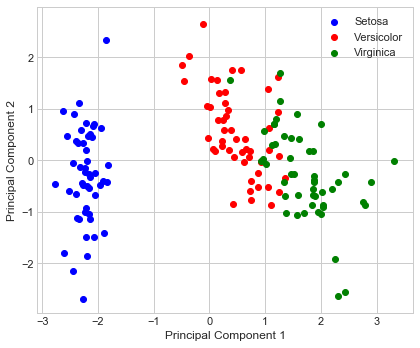

In [144]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 5))
    for lab, col in zip(('Setosa', 'Versicolor', 'Virginica'), ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper')
    plt.tight_layout()
    plt.show()

In [67]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

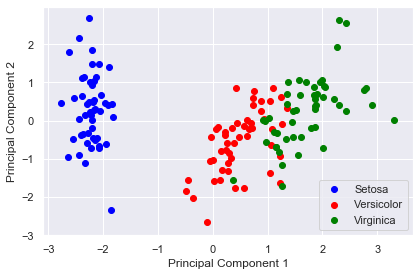

In [155]:
#with plt.style.context('seaborn-darkgrid'):
sns.set()
plt.figure(figsize=(6, 4))
for lab, col in zip(('Setosa', 'Versicolor', 'Virginica'),('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper')
plt.tight_layout()
plt.show()       